Importing the Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the California House Price Dataset

In [28]:
from sklearn.datasets import fetch_california_housing
house_price_dataset = fetch_california_housing() # Removed the unexpected indentation

In [29]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [32]:
# Loading the dataset to a Pandas Dataframe
housing_df = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [33]:
#Print first 5 rows of our dataframe
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [36]:
# adding target (price) column to the DataFrame
housing_df['Price'] = house_price_dataset.target

In [37]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [39]:
# checking the number of rows and columns
housing_df.shape

(20640, 10)

In [40]:
#checking for any missing values
housing_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0
Price,0


In [41]:
# statistical measures of the dataset
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,5.000010


Understanding the various features and their correlation between them


1) Positive Correlation

2) Negative Correlation

In [42]:
correlation = housing_df.corr()

<Axes: >

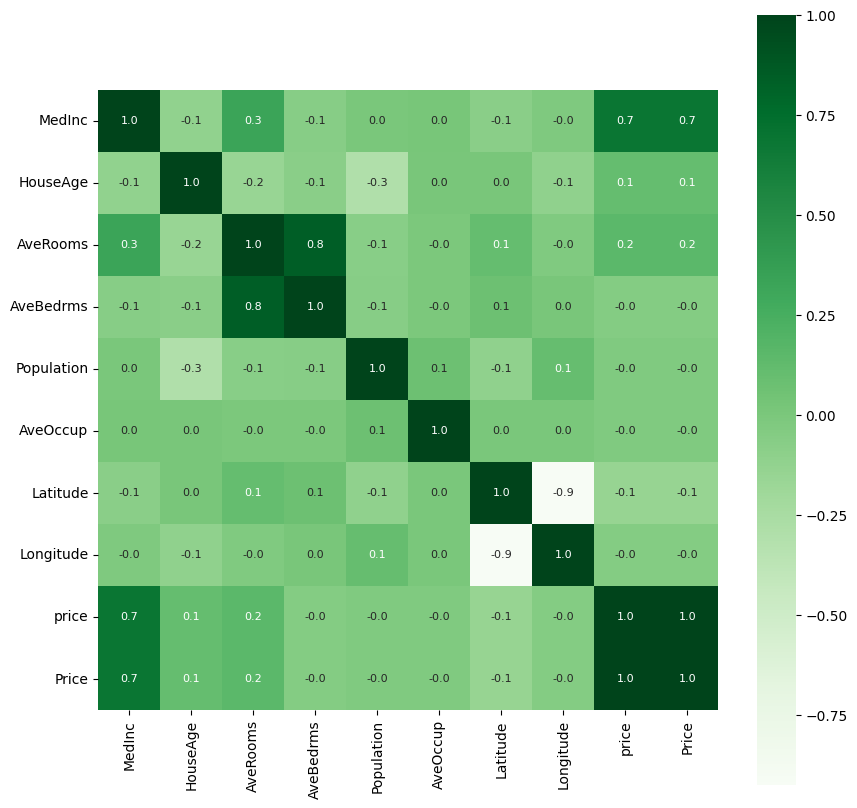

In [44]:
# Generate a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

Splitting Data and Target

In [45]:
X = housing_df.drop(['price'], axis =1)
Y = housing_df['price']

In [46]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  Price
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23  4.526
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22  3.585
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24  3.521
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25  3.413
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25  3.422
...       ...       ...       ...        ...         ...       ...       ...        ...    ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09  0.781
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21  0.771
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22  0.923
20638  1.8672      18.0  5.329513   1.171920      

Splitting data into Training and Test data

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
print(X.shape, X_test.shape, X_train.shape)

(20640, 9) (4128, 9) (16512, 9)


Model Training XGBOOST Regressor

In [50]:
# loading the model
model = XGBRegressor()

In [51]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction on Training Data

In [52]:
#accuracy for prediction on training data
training_data_prediction= model.predict(X_train)

In [53]:
print(training_data_prediction)

[0.7217324 2.7355433 0.5786305 ... 1.9222438 1.5352833 0.8096097]


In [54]:
# R squared error
score_1= metrics.r2_score(Y_train, training_data_prediction)

#Mean Squared error
score_2=metrics.mean_squared_error(Y_train, training_data_prediction)

print("R Squared Error",score_1)
print("Mean Squared Error",score_2)

R Squared Error 0.9999843708817635
Mean Squared Error 2.0749556891234482e-05


Visualizing the actual and predicted prices

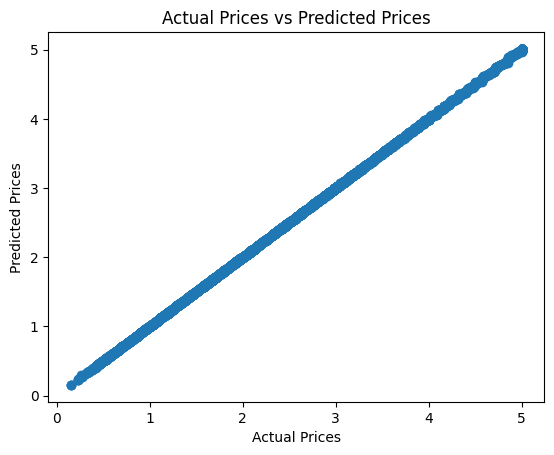

In [57]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Prediction on Test Data

In [55]:
#accuracy for prediction on training data
test_data_prediction=model.predict(X_test)

In [56]:
# R squared error
score_1= metrics.r2_score(Y_test, test_data_prediction)

#Mean Squared error
score_2=metrics.mean_squared_error(Y_test, test_data_prediction)

print("R Squared Error",score_1)
print("Mean Squared Error",score_2)

R Squared Error 0.999929603126291
Mean Squared Error 9.482630592635414e-05
